<a href="https://www.kaggle.com/code/rajatraj0502/world-s-biggest-data-breaches-hacks?scriptVersionId=138723421" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worlds-biggest-data-breaches-and-hacks/Balloon Race Data Breaches - LATEST - breaches.csv


In [2]:
# Load the csv file into a pandas DataFrame
data = pd.read_csv('/kaggle/input/worlds-biggest-data-breaches-and-hacks/Balloon Race Data Breaches - LATEST - breaches.csv')

# Display the first 5 rows of the DataFrame
data.head()

,organisation,alternative name,records lost,year,date,story,sector,method,interesting story,data sensitivity,displayed records,Unnamed: 11,source name,1st source link,2nd source link,ID
0,visualisation here: https://informationisbeaut...,NaN,"(use 3m, 4m, 5m or 10m to approximate unknown ...",year story broke,NaN,NaN,web\nhealthcare\napp\nretail\ngaming\ntranspor...,poor security\nhacked\noops!\nlost device \nin...,NaN,1. Just email address/Online information \n2 S...,"=IF(C3>100000000,C3,"")",NaN,NaN,NaN,NaN,NaN
1,Plex,NaN,"15,000,000",2022,Aug 2022,"Intruders access password data, usernames, and...",web,hacked,NaN,1,NaN,NaN,Ars technica,https://arstechnica.com/information-technology...,NaN,418.0
2,Twitter,NaN,"5,400,000",2021,Dec 2021,Zero day vulnerability allowed a threat actor ...,web,hacked,NaN,2,NaN,NaN,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,NaN,419.0
3,Shanghai Police,NaN,"500,000,000",2022,Jul 2022,A database containing records of over a billio...,financial,hacked,NaN,5,"""one billion""",NaN,The Register,https://www.theregister.com/2022/07/05/shangha...,NaN,420.0
4,"City of Amagasaki, Japan",NaN,"500,000",2022,Jun 2022,An unnamed government official lost his bag af...,government,oops!,NaN,3,NaN,NaN,BBC,https://www.bbc.co.uk/news/world-asia-61921222,NaN,421.0


In [3]:
# Strip all leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Rename the columns again with corrected names
data = data.rename(columns={
    'organisation': 'Organization',
    'alternative name': 'Alternative Name',
    'records lost': 'Records Lost',
    'year': 'Year',
    'date': 'Date',
    'story': 'Story',
    'sector': 'Sector',
    'method': 'Method',
    'interesting story': 'Interesting Story',
    'data sensitivity': 'Data Sensitivity',
    'displayed records': 'Displayed Records',
    'source name': 'Source Name',
    '1st source link': '1st Source Link',
    '2nd source link': '2nd Source Link',
    'ID': 'ID'
})

# Convert Year and Records Lost to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Records Lost'] = data['Records Lost'].str.replace(',', '').apply(pd.to_numeric, errors='coerce')

# Display the first 5 rows of the cleaned DataFrame
data.head()


,Organization,Alternative Name,Records Lost,Year,Date,Story,Sector,Method,Interesting Story,Data Sensitivity,Displayed Records,Unnamed: 11,Source Name,1st Source Link,2nd Source Link,ID
0,visualisation here: https://informationisbeaut...,NaN,NaN,NaN,NaN,NaN,web\nhealthcare\napp\nretail\ngaming\ntranspor...,poor security\nhacked\noops!\nlost device \nin...,NaN,1. Just email address/Online information \n2 S...,"=IF(C3>100000000,C3,"")",NaN,NaN,NaN,NaN,NaN
1,Plex,NaN,15000000.0,2022.0,Aug 2022,"Intruders access password data, usernames, and...",web,hacked,NaN,1,NaN,NaN,Ars technica,https://arstechnica.com/information-technology...,NaN,418.0
2,Twitter,NaN,5400000.0,2021.0,Dec 2021,Zero day vulnerability allowed a threat actor ...,web,hacked,NaN,2,NaN,NaN,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,NaN,419.0
3,Shanghai Police,NaN,500000000.0,2022.0,Jul 2022,A database containing records of over a billio...,financial,hacked,NaN,5,"""one billion""",NaN,The Register,https://www.theregister.com/2022/07/05/shangha...,NaN,420.0
4,"City of Amagasaki, Japan",NaN,500000.0,2022.0,Jun 2022,An unnamed government official lost his bag af...,government,oops!,NaN,3,NaN,NaN,BBC,https://www.bbc.co.uk/news/world-asia-61921222,NaN,421.0


In [4]:
# Correct the column names and try again
data = data.rename(columns={
    'organisation': 'Organization',
    'alternative name': 'Alternative Name',
    'records lost': 'Records Lost',
    'year ': 'Year',  # corrected the extra space here
    'date': 'Date',
    'story': 'Story',
    'sector': 'Sector',
    'method': 'Method',
    'interesting story': 'Interesting Story',
    'data sensitivity': 'Data Sensitivity',
    'displayed records': 'Displayed Records',
    'source name': 'Source Name',
    '1st source link': '1st Source Link',
    '2nd source link': '2nd Source Link',
    'ID': 'ID'
})

# Drop the first row and the unnecessary column
data = data.drop([0])
data = data.drop(columns=["Unnamed: 11"])

# Rename some of the columns
data = data.rename(columns={
    'organisation': 'Organization',
    'alternative name': 'Alternative Name',
    'records lost': 'Records Lost',
    'year ': 'Year',
    'date': 'Date',
    'story': 'Story',
    'sector': 'Sector',
    'method': 'Method',
    'interesting story': 'Interesting Story',
    'data sensitivity': 'Data Sensitivity',
    'displayed records': 'Displayed Records',
    'source name': 'Source Name',
    '1st source link': '1st Source Link',
    '2nd source link': '2nd Source Link',
    'ID': 'ID'
})

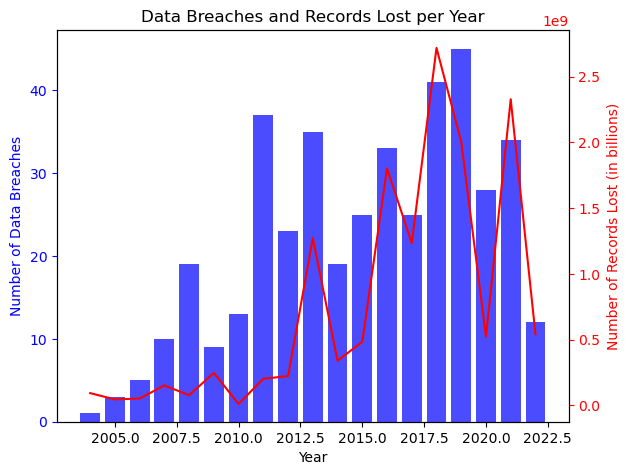

In [5]:
import matplotlib.pyplot as plt

# Group by Year and calculate the count of breaches and sum of records lost
data_grouped = data.groupby('Year').agg({'Organization':'count', 'Records Lost':'sum'}).reset_index()

# Plotting
fig, ax1 = plt.subplots()

# Bar plot for number of breaches
ax1.bar(data_grouped['Year'], data_grouped['Organization'], color='blue', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Data Breaches', color='blue')
ax1.tick_params('y', colors='blue')

# Second y axis for number of records lost
ax2 = ax1.twinx()
ax2.plot(data_grouped['Year'], data_grouped['Records Lost'], color='red')
ax2.set_ylabel('Number of Records Lost (in billions)', color='red')
ax2.tick_params('y', colors='red')

fig.tight_layout()
plt.title('Data Breaches and Records Lost per Year')
plt.show()


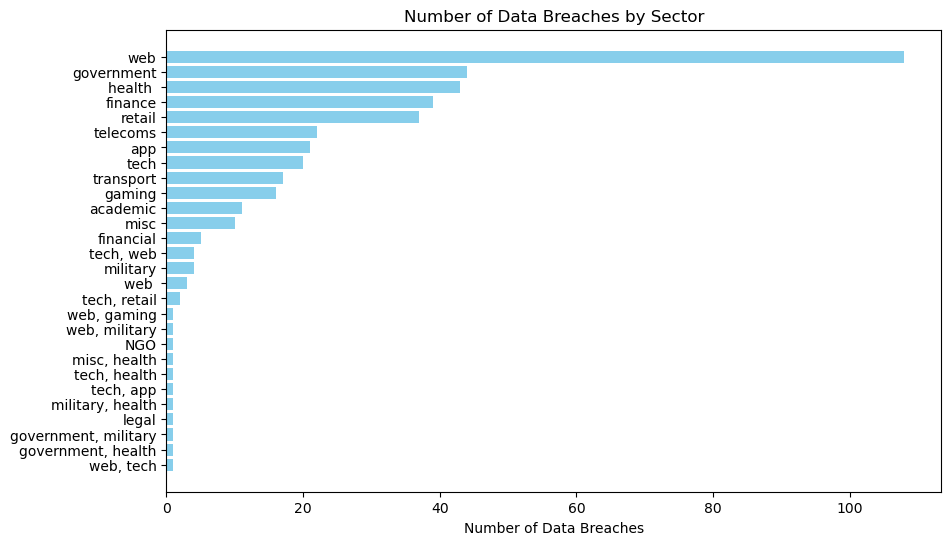

In [6]:
# Group by Sector and calculate the count of breaches
data_sector = data.groupby('Sector').agg({'Organization':'count'}).reset_index()

# Sort by the number of breaches
data_sector = data_sector.sort_values('Organization', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(data_sector['Sector'], data_sector['Organization'], color='skyblue')
plt.xlabel('Number of Data Breaches')
plt.title('Number of Data Breaches by Sector')
plt.gca().invert_yaxis()  # Reverse the order of sectors
plt.show()


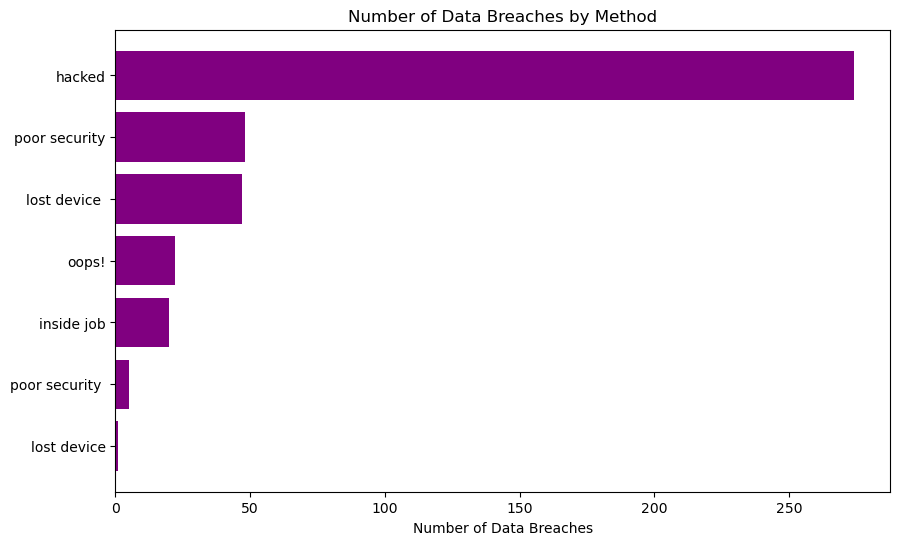

In [7]:
# Group by Method and calculate the count of breaches
data_method = data.groupby('Method').agg({'Organization':'count'}).reset_index()

# Sort by the number of breaches
data_method = data_method.sort_values('Organization', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(data_method['Method'], data_method['Organization'], color='purple')
plt.xlabel('Number of Data Breaches')
plt.title('Number of Data Breaches by Method')
plt.gca().invert_yaxis()  # Reverse the order of methods
plt.show()


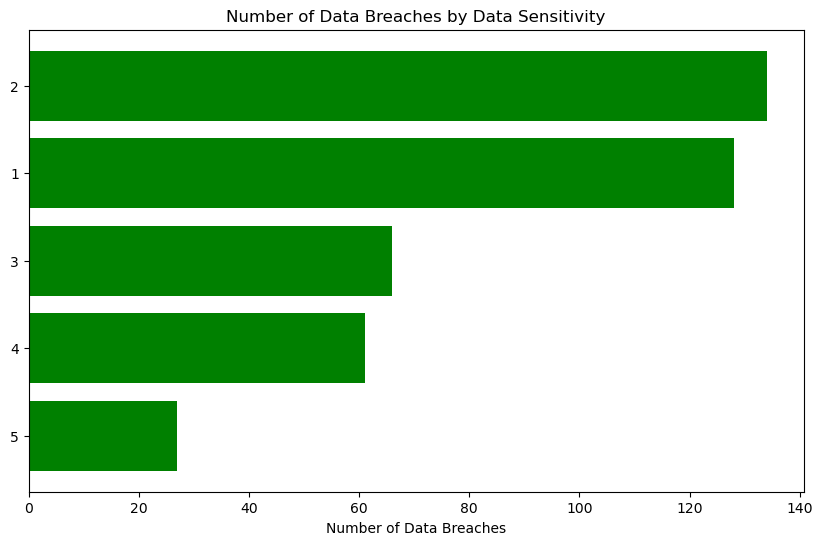

In [8]:
# Group by Data Sensitivity and calculate the count of breaches
data_sensitivity = data.groupby('Data Sensitivity').agg({'Organization':'count'}).reset_index()

# Sort by the number of breaches
data_sensitivity = data_sensitivity.sort_values('Organization', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(data_sensitivity['Data Sensitivity'], data_sensitivity['Organization'], color='green')
plt.xlabel('Number of Data Breaches')
plt.title('Number of Data Breaches by Data Sensitivity')
plt.gca().invert_yaxis()  # Reverse the order of sensitivity levels
plt.show()


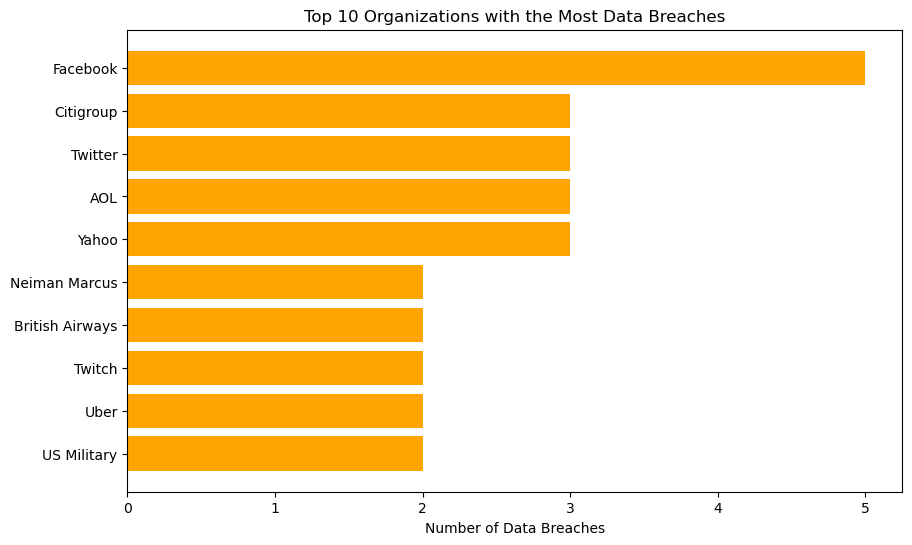

In [9]:
# Group by Organization and calculate the count of breaches
data_org = data.groupby('Organization').agg({'ID':'count'}).reset_index()

# Sort by the number of breaches
data_org = data_org.sort_values('ID', ascending=False)

# Display the top 10 organizations with the most breaches
data_org_top10 = data_org.head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(data_org_top10['Organization'], data_org_top10['ID'], color='orange')
plt.xlabel('Number of Data Breaches')
plt.title('Top 10 Organizations with the Most Data Breaches')
plt.gca().invert_yaxis()  # Reverse the order of organizations
plt.show()


In [10]:
# Filter the data for interesting stories
data_interesting = data[data['Interesting Story'] == 'y']

# Count the number of interesting stories
num_interesting = data_interesting.shape[0]

# Display the number of interesting stories and some examples
num_interesting, data_interesting.head()


(85,
               Organization Alternative Name  Records Lost    Year      Date  \
 5   Dubai Real Estate Leak              NaN      800000.0  2022.0  May 2022   
 26                  Twitch              NaN    10000000.0  2021.0  Oct 2021   
 28          Pandora Papers              NaN    11900000.0  2021.0  Oct 2021   
 30                    Epik              NaN    15000000.0  2021.0  Sep 2021   
 41          Amazon Reviews              NaN    13124962.0  2021.0  May 2021   
 
                                                 Story      Sector  \
 5   Data leak exposes how criminals, officials, an...   financial   
 26  Full source code breach of the streaming gamin...      gaming   
 28  Millions of documents reveal offshore deals an...  government   
 30  An Internet-services company for concealing on...      retail   
 41  Database exposing an organized fake reviews sc...         web   
 
             Method Interesting Story Data Sensitivity Displayed Records  \
 5       inside

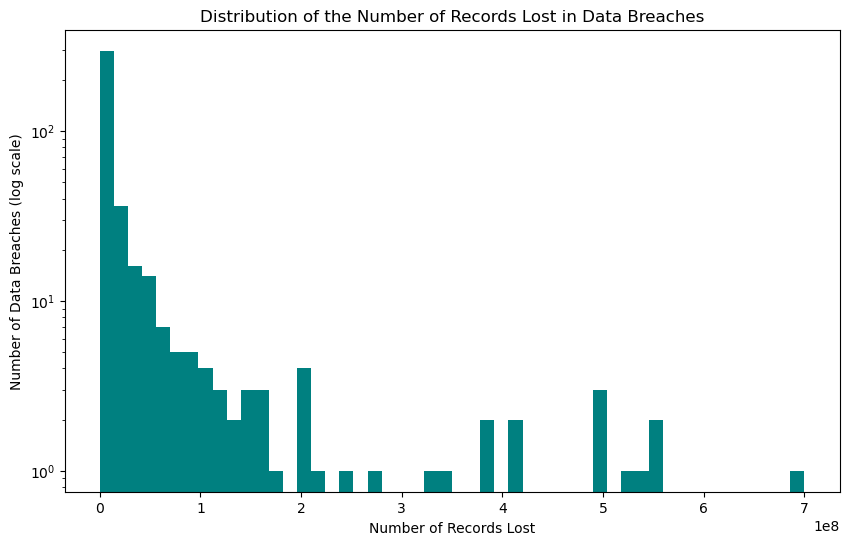

In [11]:
# Plot a histogram for the distribution of the number of records lost
plt.figure(figsize=(10,6))
plt.hist(data['Records Lost'], bins=50, color='teal', log=True)
plt.xlabel('Number of Records Lost')
plt.ylabel('Number of Data Breaches (log scale)')
plt.title('Distribution of the Number of Records Lost in Data Breaches')
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the data
data_encoded = data.copy()

# Initialize a label encoder
label_encoder = LabelEncoder()

# Convert non-numeric fields to numbers
for column in ['Organization', 'Alternative Name', 'Date', 'Story', 'Sector', 'Method', 'Interesting Story', 'Source Name', '1st Source Link', '2nd Source Link']:
    data_encoded[column] = label_encoder.fit_transform(data[column].astype(str))

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Display the correlation matrix
corr_matrix


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/1951712369.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_encoded.corr()


,Organization,Alternative Name,Records Lost,Year,Date,Story,Sector,Method,Interesting Story,Source Name,1st Source Link,2nd Source Link,ID
Organization,1.000000,0.023626,0.013990,0.004729,-0.005776,0.005795,-0.047124,-0.022236,0.001869,-0.020222,-0.052088,-0.017485,-0.014615
Alternative Name,0.023626,1.000000,0.024346,0.220285,0.148938,0.183189,0.053848,-0.039292,-0.047572,0.036664,0.128270,0.044120,0.223624
Records Lost,0.013990,0.024346,1.000000,0.169647,0.121411,-0.064389,0.152295,0.070631,-0.040585,0.013175,0.103481,-0.002270,0.162800
Year,0.004729,0.220285,0.169647,1.000000,0.296719,0.160410,0.182950,-0.037401,-0.203872,0.134007,0.411443,0.083565,0.985339
Date,-0.005776,0.148938,0.121411,0.296719,1.000000,0.021429,0.084451,-0.052808,0.002560,-0.081218,0.114218,0.022332,0.297984
Story,0.005795,0.183189,-0.064389,0.160410,0.021429,1.000000,0.073077,-0.124563,-0.104966,-0.009772,-0.031528,-0.043781,0.157891
Sector,-0.047124,0.053848,0.152295,0.182950,0.084451,0.073077,1.000000,-0.121743,-0.095577,0.050565,0.023960,-0.100849,0.161003
Method,-0.022236,-0.039292,0.070631,-0.037401,-0.052808,-0.124563,-0.121743,1.000000,0.061575,-0.022371,0.012285,0.058832,-0.022307
Interesting Story,0.001869,-0.047572,-0.040585,-0.203872,0.002560,-0.104966,-0.095577,0.061575,1.000000,-0.109393,-0.134846,0.062810,-0.190258
Source Name,-0.020222,0.036664,0.013175,0.134007,-0.081218,-0.009772,0.050565,-0.022371,-0.109393,1.000000,0.261679,0.065051,0.122438


In [13]:
# Sort the data by the number of records lost
data_top10_breaches = data.sort_values('Records Lost', ascending=False)

# Display the top 10 breaches with the most records lost
data_top10_breaches = data_top10_breaches.head(10)

# Display the result
data_top10_breaches[['Organization', 'Year', 'Records Lost', 'Sector', 'Method']]


,Organization,Year,Records Lost,Sector,Method
36,Linkedin,2021.0,700000000.0,web,hacked
143,Aadhaar,2018.0,550000000.0,government,poor security
269,Yahoo,2013.0,550000000.0,web,hacked
50,Facebook,2021.0,533000000.0,tech,hacked
168,Spambot,2017.0,520000000.0,web,poor security
189,Yahoo,2016.0,500000000.0,web,hacked
27,Syniverse,2021.0,500000000.0,telecoms,hacked
3,Shanghai Police,2022.0,500000000.0,financial,hacked
116,Facebook,2019.0,419000000.0,web,poor security
216,Friend Finder Network,2016.0,412000000.0,web,hacked


In [14]:
# Display the detailed stories for the top 5 breaches
data_top5_stories = data_top10_breaches.head(5)[['Organization', 'Year', 'Records Lost', 'Story']]

# Display the result
data_top5_stories


,Organization,Year,Records Lost,Story
36,Linkedin,2021.0,700000000.0,The hacker appears to have misused the officia...
143,Aadhaar,2018.0,550000000.0,India's biometric database was breached via a ...
269,Yahoo,2013.0,550000000.0,A 2013 attack was eventually disclosed in 2016...
50,Facebook,2021.0,533000000.0,"Phone numbers, full names, locations, email ad..."
168,Spambot,2017.0,520000000.0,A misconfigured spambot leaked email addresses...


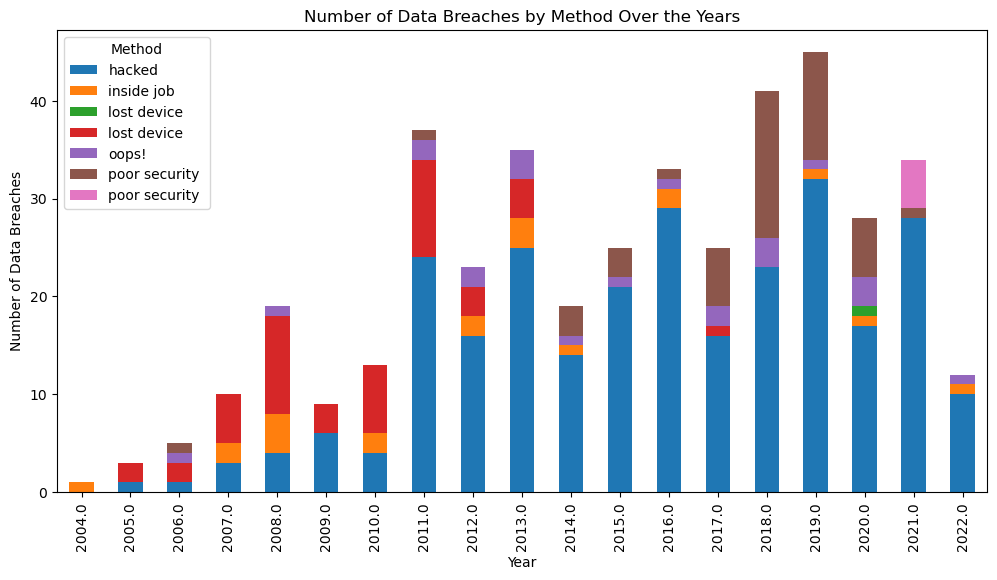

In [15]:
# Group the data by Year and Method and count the number of breaches
data_year_method = data.groupby(['Year', 'Method']).size().reset_index(name='Count')

# Pivot the data to get years as rows, methods as columns, and counts as values
data_year_method_pivot = data_year_method.pivot(index='Year', columns='Method', values='Count')

# Fill missing values with 0 (for years when a certain method was not used)
data_year_method_pivot = data_year_method_pivot.fillna(0)

# Plot a stacked bar chart
data_year_method_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Data Breaches')
plt.title('Number of Data Breaches by Method Over the Years')
plt.legend(title='Method')
plt.show()


In [16]:
# Group the interesting breaches by Sector and count the number of breaches
data_interesting_sector = data_interesting.groupby('Sector').agg({'Organization':'count'}).reset_index()

# Group the interesting breaches by Organization and count the number of breaches
data_interesting_org = data_interesting.groupby('Organization').agg({'ID':'count'}).reset_index()

# Group the interesting breaches by Method and count the number of breaches
data_interesting_method = data_interesting.groupby('Method').agg({'Organization':'count'}).reset_index()

# Sort by the number of breaches
data_interesting_sector = data_interesting_sector.sort_values('Organization', ascending=False)
data_interesting_org = data_interesting_org.sort_values('ID', ascending=False)
data_interesting_method = data_interesting_method.sort_values('Organization', ascending=False)

# Display the top 5 sectors, organizations, and methods with the most interesting breaches
data_interesting_sector_top5 = data_interesting_sector.head(5)
data_interesting_org_top5 = data_interesting_org.head(5)
data_interesting_method_top5 = data_interesting_method.head(5)

data_interesting_sector_top5, data_interesting_org_top5, data_interesting_method_top5


(        Sector  Organization
 2      finance            14
 17         web            13
 7      health             11
 5   government             8
 11      retail             8,
        Organization  ID
 22         Facebook   2
 68      US Military   2
 2              AT&T   2
 33  JP Morgan Chase   2
 14        Citigroup   2,
           Method  Organization
 0         hacked            48
 2   lost device             16
 3          oops!             8
 4  poor security             7
 1     inside job             5)

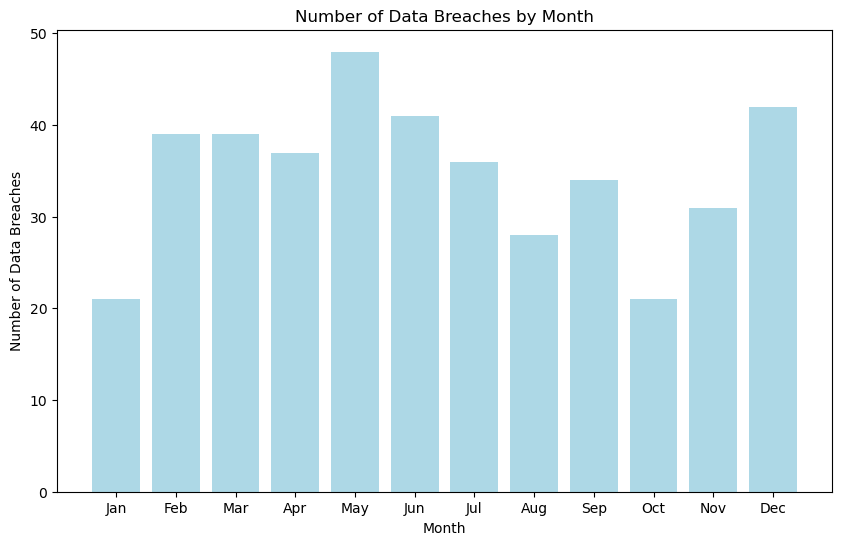

In [17]:
# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract the month from the Date
data['Month'] = data['Date'].dt.month

# Group by Month and calculate the count of breaches
data_month = data.groupby('Month').agg({'Organization':'count'}).reset_index()

# Sort by the month
data_month = data_month.sort_values('Month')

# Plot
plt.figure(figsize=(10,6))
plt.bar(data_month['Month'], data_month['Organization'], color='lightblue')
plt.xlabel('Month')
plt.ylabel('Number of Data Breaches')
plt.title('Number of Data Breaches by Month')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


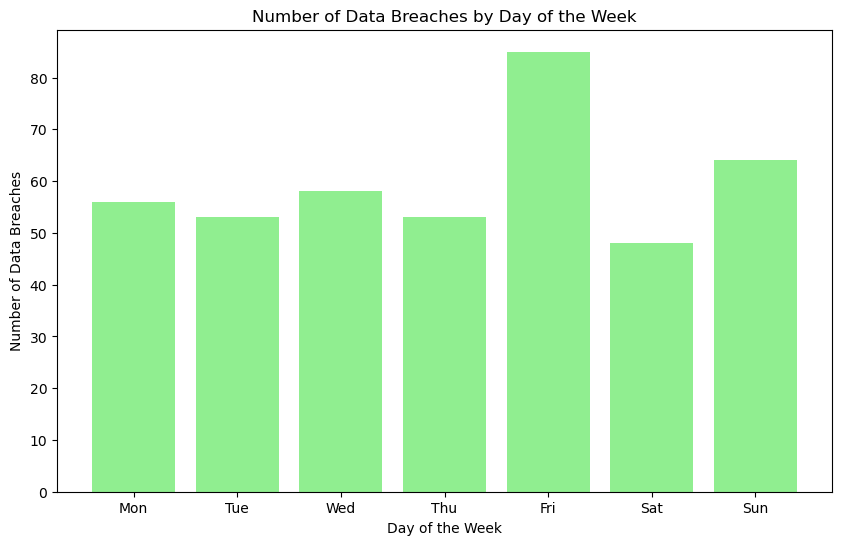

In [18]:
# Extract the day of the week from the Date (0 = Monday, 6 = Sunday)
data['Day of Week'] = data['Date'].dt.dayofweek

# Group by Day of Week and calculate the count of breaches
data_day_of_week = data.groupby('Day of Week').agg({'Organization':'count'}).reset_index()

# Sort by the day of the week
data_day_of_week = data_day_of_week.sort_values('Day of Week')

# Plot
plt.figure(figsize=(10,6))
plt.bar(data_day_of_week['Day of Week'], data_day_of_week['Organization'], color='lightgreen')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Data Breaches')
plt.title('Number of Data Breaches by Day of the Week')
plt.xticks(ticks=range(0,7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


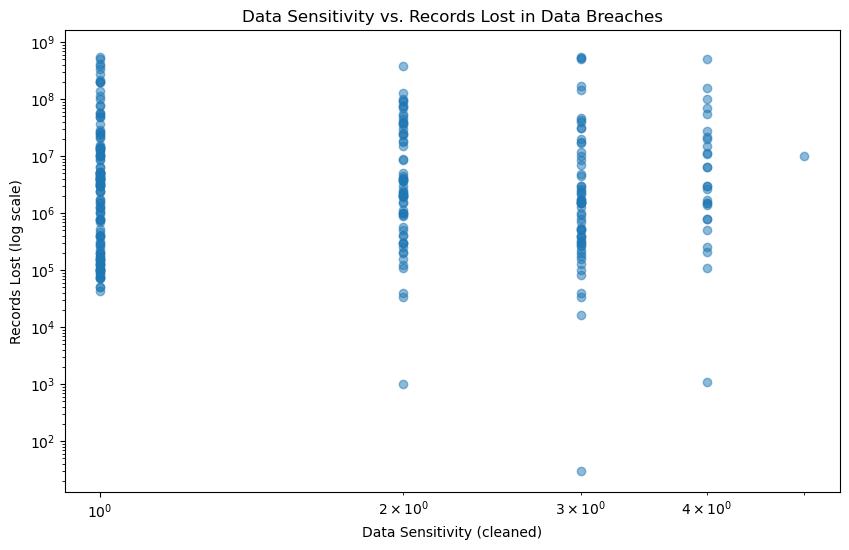

In [19]:
# Clean the Data Sensitivity column
data['Data Sensitivity Clean'] = data['Data Sensitivity'].apply(lambda x: str(x) if isinstance(x, str) else 'Unknown')

# Convert the cleaned Data Sensitivity to numeric categories
data['Data Sensitivity Clean'] = label_encoder.fit_transform(data['Data Sensitivity Clean'].astype(str))

# Plot a scatter plot of Cleaned Data Sensitivity vs. Records Lost
plt.figure(figsize=(10,6))
plt.scatter(data['Data Sensitivity Clean'], data['Records Lost'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Data Sensitivity (cleaned)')
plt.ylabel('Records Lost (log scale)')
plt.title('Data Sensitivity vs. Records Lost in Data Breaches')
plt.show()


In [20]:
# Calculate the average data sensitivity for each sector
data_sector_sensitivity = data.groupby('Sector').agg({'Data Sensitivity Clean':'mean'}).reset_index()

# Sort by the average data sensitivity
data_sector_sensitivity = data_sector_sensitivity.sort_values('Data Sensitivity Clean', ascending=False)

# Display the top 5 sectors with the highest average data sensitivity
data_sector_sensitivity_top5 = data_sector_sensitivity.head(5)

# Display the result
data_sector_sensitivity_top5


,Sector,Data Sensitivity Clean
14,"misc, health",4.0
7,"government, health",4.0
18,"tech, health",3.0
12,"military, health",3.0
0,NGO,3.0


In [21]:
# Calculate the average data sensitivity for each method
data_method_sensitivity = data.groupby('Method').agg({'Data Sensitivity Clean':'mean'}).reset_index()

# Sort by the average data sensitivity
data_method_sensitivity = data_method_sensitivity.sort_values('Data Sensitivity Clean', ascending=False)

# Display the top 5 methods with the highest average data sensitivity
data_method_sensitivity_top5 = data_method_sensitivity.head(5)

# Display the result
data_method_sensitivity_top5


,Method,Data Sensitivity Clean
2,lost device,3.000000
1,inside job,1.850000
6,poor security,1.800000
3,lost device,1.744681
5,poor security,1.437500


In [22]:
# Define a high data sensitivity threshold
high_sensitivity_threshold = 4

# Filter for breaches with high data sensitivity
data_high_sensitivity = data[data['Data Sensitivity Clean'] >= high_sensitivity_threshold]

# Group by Organization and count the number of high-sensitivity breaches
data_org_high_sensitivity = data_high_sensitivity.groupby('Organization').agg({'ID':'count'}).reset_index()

# Sort by the number of breaches
data_org_high_sensitivity = data_org_high_sensitivity.sort_values('ID', ascending=False)

# Display the top 5 organizations with the most high-sensitivity breaches
data_org_high_sensitivity_top5 = data_org_high_sensitivity.head(5)

# Display the result
data_org_high_sensitivity_top5


,Organization,ID
0,ClixSense,1
1,Digital Ocean,1
26,VTech,1
25,US Office of Personnel Management (2nd Breach),1
24,US Military,1


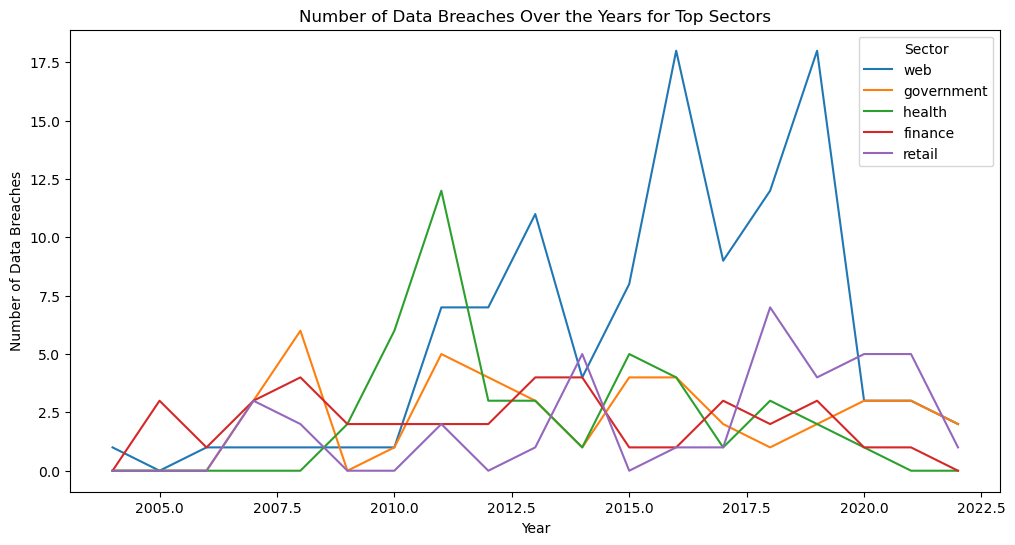

In [23]:
# Group the data by Year and Sector and count the number of breaches
data_year_sector = data.groupby(['Year', 'Sector']).size().reset_index(name='Count')

# Pivot the data to get years as rows, sectors as columns, and counts as values
data_year_sector_pivot = data_year_sector.pivot(index='Year', columns='Sector', values='Count')

# Fill missing values with 0 (for years when a certain sector did not have any breaches)
data_year_sector_pivot = data_year_sector_pivot.fillna(0)


# Get the top 5 sectors with the most breaches
data_sector_top5 = data.groupby('Sector').size().sort_values(ascending=False).head(5).index

# Plot a line chart for the top 5 sectors with the most breaches
plt.figure(figsize=(12, 6))
for sector in data_sector_top5:
    plt.plot(data_year_sector_pivot.index, data_year_sector_pivot[sector], label=sector)
plt.xlabel('Year')
plt.ylabel('Number of Data Breaches')
plt.title('Number of Data Breaches Over the Years for Top Sectors')
plt.legend(title='Sector')
plt.show()


In [24]:
# Define the top sectors
top_sectors = data_sector_top5

# Filter for the top sectors
data_top_sectors = data[data['Sector'].isin(top_sectors)]

# Group by Sector and Method, and count the number of breaches
data_sector_method = data_top_sectors.groupby(['Sector', 'Method']).size().reset_index(name='Count')

# Find the top method for each sector
data_sector_method_top = data_sector_method.sort_values(['Sector', 'Count'], ascending=[True, False]).groupby('Sector').head(1)

# Display the result
data_sector_method_top


,Sector,Method,Count
0,finance,hacked,23
5,government,hacked,21
14,health,lost device,20
17,retail,hacked,26
22,web,hacked,89


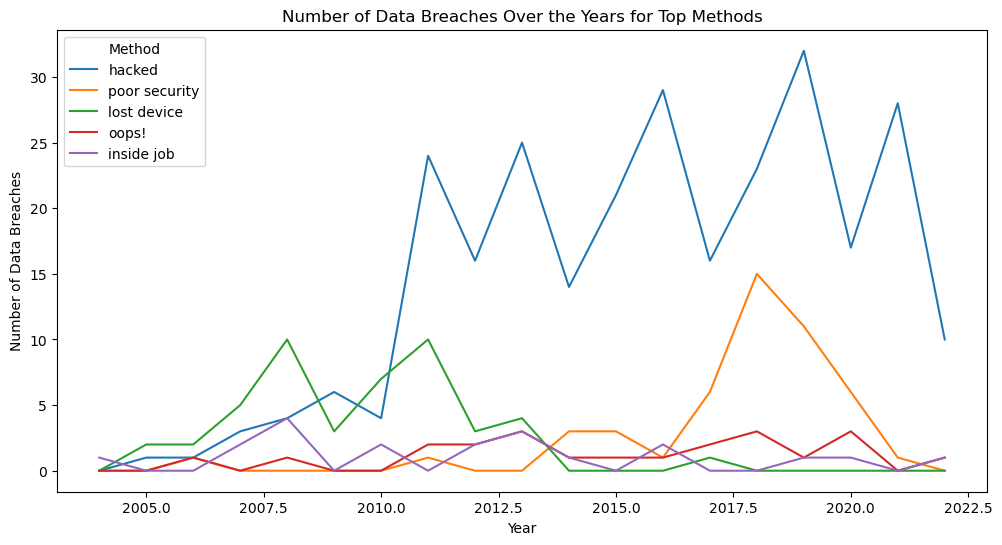

In [25]:
# Group the data by Year and Method and count the number of breaches
data_year_method = data.groupby(['Year', 'Method']).size().reset_index(name='Count')

# Pivot the data to get years as rows, methods as columns, and counts as values
data_year_method_pivot = data_year_method.pivot(index='Year', columns='Method', values='Count')

# Fill missing values with 0 (for years when a certain method was not used)
data_year_method_pivot = data_year_method_pivot.fillna(0)

# Get the top 5 methods with the most breaches
data_method_top5 = data.groupby('Method').size().sort_values(ascending=False).head(5).index

# Plot a line chart for the top 5 methods with the most breaches
plt.figure(figsize=(12, 6))
for method in data_method_top5:
    plt.plot(data_year_method_pivot.index, data_year_method_pivot[method], label=method)
plt.xlabel('Year')
plt.ylabel('Number of Data Breaches')
plt.title('Number of Data Breaches Over the Years for Top Methods')
plt.legend(title='Method')
plt.show()


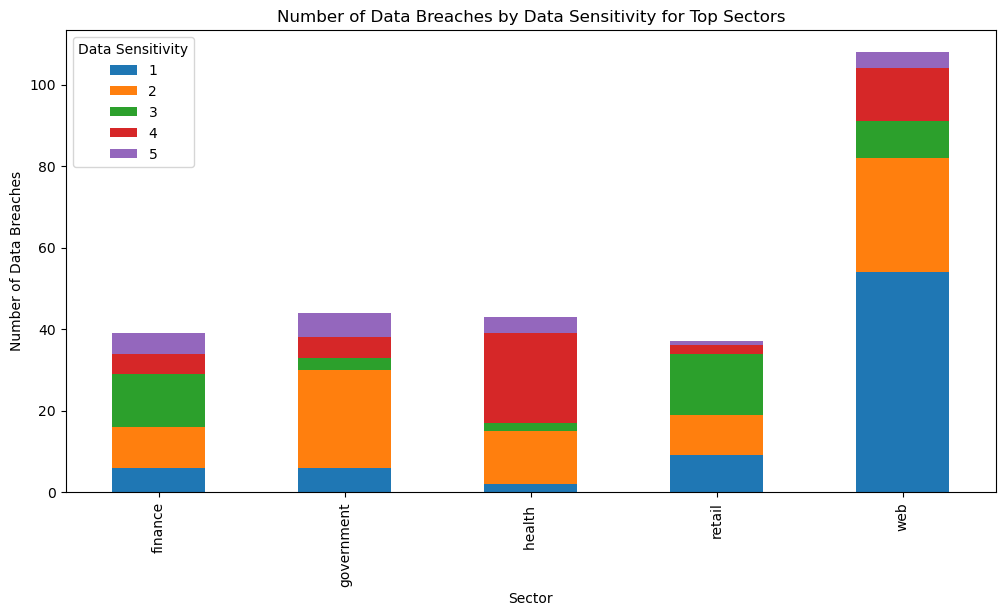

In [26]:
# Filter for the top sectors
data_top_sectors = data[data['Sector'].isin(top_sectors)]

# Group by Sector and Data Sensitivity, and count the number of breaches
data_sector_sensitivity = data_top_sectors.groupby(['Sector', 'Data Sensitivity']).size().reset_index(name='Count')

# Pivot the data to get sectors as rows, data sensitivity as columns, and counts as values
data_sector_sensitivity_pivot = data_sector_sensitivity.pivot(index='Sector', columns='Data Sensitivity', values='Count')

# Fill missing values with 0 (for data sensitivity levels not involved in breaches in certain sectors)
data_sector_sensitivity_pivot = data_sector_sensitivity_pivot.fillna(0)

# Plot a bar chart for each sector
data_sector_sensitivity_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Sector')
plt.ylabel('Number of Data Breaches')
plt.title('Number of Data Breaches by Data Sensitivity for Top Sectors')
plt.legend(title='Data Sensitivity')
plt.show()


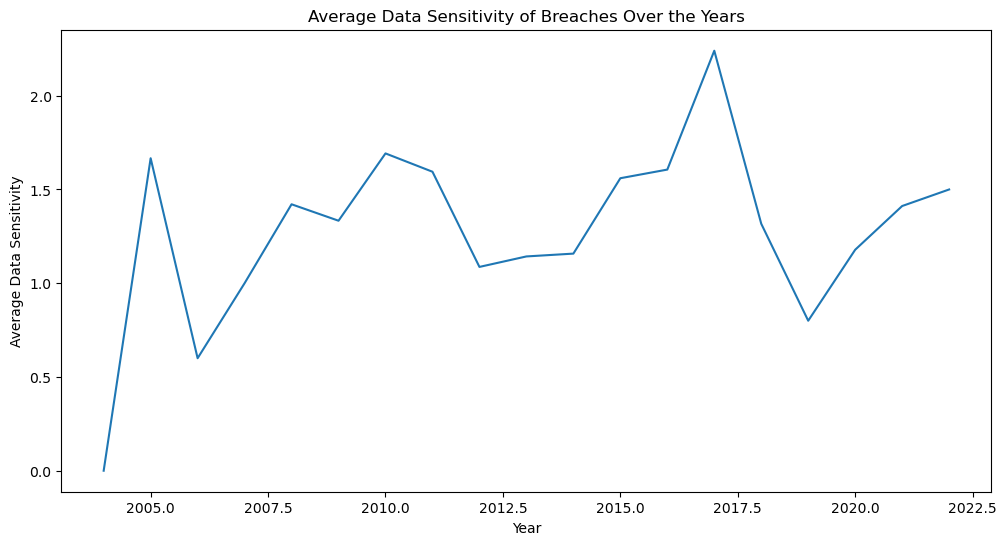

In [27]:
# Group the data by Year and calculate the average data sensitivity
data_year_sensitivity = data.groupby('Year').agg({'Data Sensitivity Clean':'mean'}).reset_index()

# Plot a line chart for the average data sensitivity over the years
plt.figure(figsize=(12, 6))
plt.plot(data_year_sensitivity['Year'], data_year_sensitivity['Data Sensitivity Clean'])
plt.xlabel('Year')
plt.ylabel('Average Data Sensitivity')
plt.title('Average Data Sensitivity of Breaches Over the Years')
plt.show()


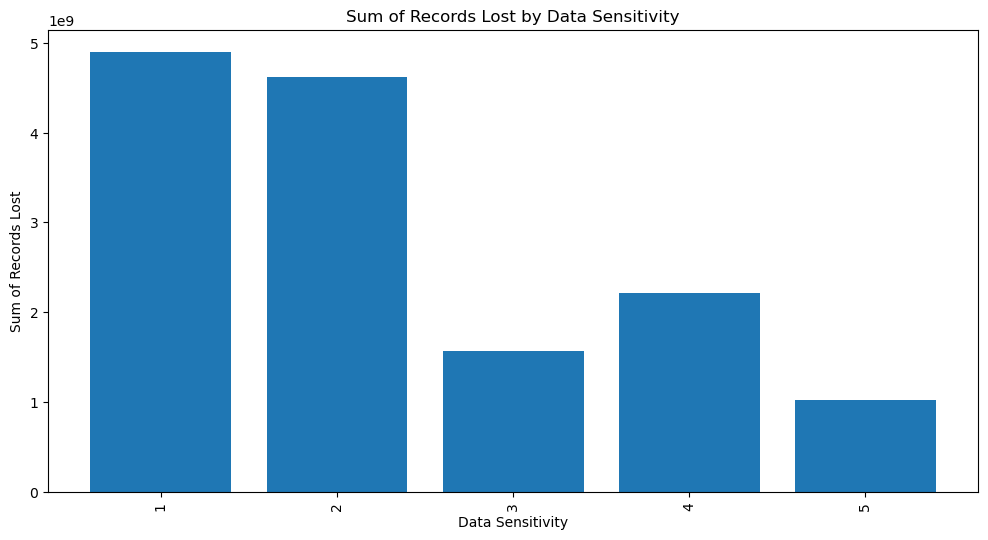

In [28]:
# Convert 'Records Lost' column to numeric values, coercing errors to NaN
data['Records Lost Clean'] = pd.to_numeric(data['Records Lost'], errors='coerce')

# Group the data by Data Sensitivity and calculate the sum of Records Lost
data_sensitivity_records = data.groupby('Data Sensitivity').agg({'Records Lost Clean':'sum'}).reset_index()

# Plot a bar chart for the sum of records lost by data sensitivity
plt.figure(figsize=(12, 6))
plt.bar(data_sensitivity_records['Data Sensitivity'], data_sensitivity_records['Records Lost Clean'])
plt.xlabel('Data Sensitivity')
plt.ylabel('Sum of Records Lost')
plt.title('Sum of Records Lost by Data Sensitivity')
plt.xticks(rotation=90)
plt.show()


In [29]:
# Calculate the correlation coefficient between Records Lost and Data Sensitivity
correlation = data['Records Lost Clean'].corr(data['Data Sensitivity Clean'])

correlation


-0.016185981102776095

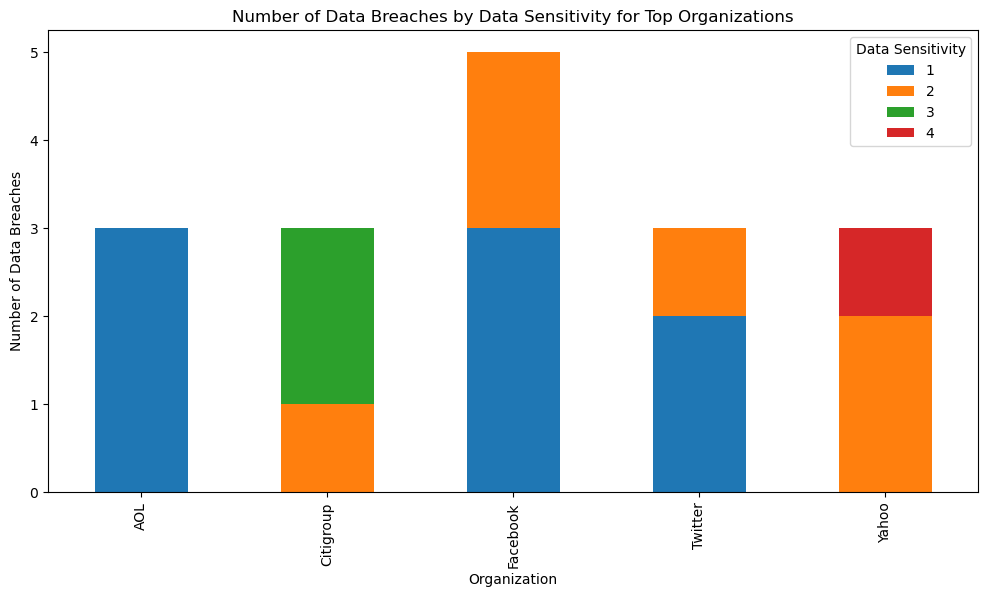

In [30]:
# Get the top 5 organizations with the most breaches
data_org_top5 = data.groupby('Organization').size().sort_values(ascending=False).head(5).index

# Filter for the top organizations
data_top_orgs = data[data['Organization'].isin(data_org_top5)]

# Group by Organization and Data Sensitivity, and count the number of breaches
data_org_sensitivity = data_top_orgs.groupby(['Organization', 'Data Sensitivity']).size().reset_index(name='Count')

# Pivot the data to get organizations as rows, data sensitivity as columns, and counts as values
data_org_sensitivity_pivot = data_org_sensitivity.pivot(index='Organization', columns='Data Sensitivity', values='Count')

# Fill missing values with 0 (for data sensitivity levels not involved in breaches in certain organizations)
data_org_sensitivity_pivot = data_org_sensitivity_pivot.fillna(0)

# Plot a bar chart for each organization
data_org_sensitivity_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Organization')
plt.ylabel('Number of Data Breaches')
plt.title('Number of Data Breaches by Data Sensitivity for Top Organizations')
plt.legend(title='Data Sensitivity')
plt.show()


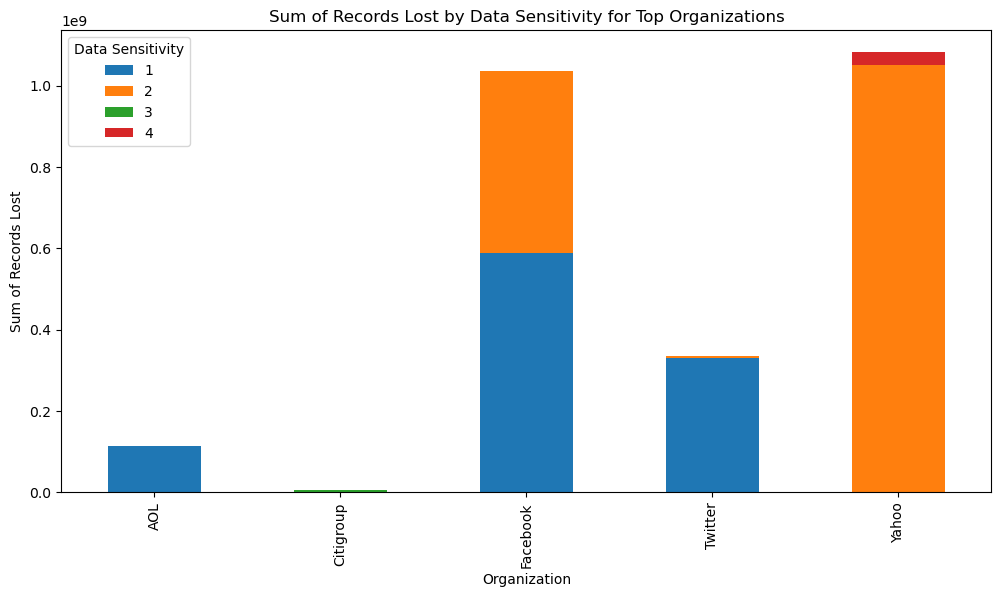

In [31]:
# Group by Organization and Data Sensitivity, and calculate the sum of Records Lost
data_org_sensitivity_records = data_top_orgs.groupby(['Organization', 'Data Sensitivity']).agg({'Records Lost Clean':'sum'}).reset_index()

# Pivot the data to get organizations as rows, data sensitivity as columns, and sum of records lost as values
data_org_sensitivity_records_pivot = data_org_sensitivity_records.pivot(index='Organization', columns='Data Sensitivity', values='Records Lost Clean')

# Fill missing values with 0 (for data sensitivity levels not involved in breaches in certain organizations)
data_org_sensitivity_records_pivot = data_org_sensitivity_records_pivot.fillna(0)

# Plot a bar chart for each organization
data_org_sensitivity_records_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Organization')
plt.ylabel('Sum of Records Lost')
plt.title('Sum of Records Lost by Data Sensitivity for Top Organizations')
plt.legend(title='Data Sensitivity')
plt.show()


In [32]:
# Initialize a dictionary to store the correlation coefficients for each sector
correlations = {}

# For each of the top sectors
for sector in top_sectors:
    # Filter for the sector
    data_sector = data[data['Sector'] == sector]
    
    # Calculate the correlation coefficient between Records Lost and Data Sensitivity
    correlation = data_sector['Records Lost Clean'].corr(data_sector['Data Sensitivity Clean'])
    
    # Store the correlation coefficient in the dictionary
    correlations[sector] = correlation

# Convert the dictionary to a pandas Series for easier display
correlations_series = pd.Series(correlations)

correlations_series


web           0.020140
government    0.185214
health       -0.159453
finance       0.085595
retail        0.172012
dtype: float64

In [33]:
# Initialize a dictionary to store the correlation coefficients for each organization
correlations = {}

# For each of the top organizations
for org in data_org_top5:
    # Filter for the organization
    data_org = data[data['Organization'] == org]
    
    # Calculate the correlation coefficient between Records Lost and Data Sensitivity
    correlation = data_org['Records Lost Clean'].corr(data_org['Data Sensitivity Clean'])
    
    # Store the correlation coefficient in the dictionary
    correlations[org] = correlation

# Convert the dictionary to a pandas Series for easier display
correlations_series = pd.Series(correlations)

correlations_series


Facebook     0.060864
Citigroup    0.512047
Twitter     -0.488149
AOL               NaN
Yahoo       -0.996165
dtype: float64

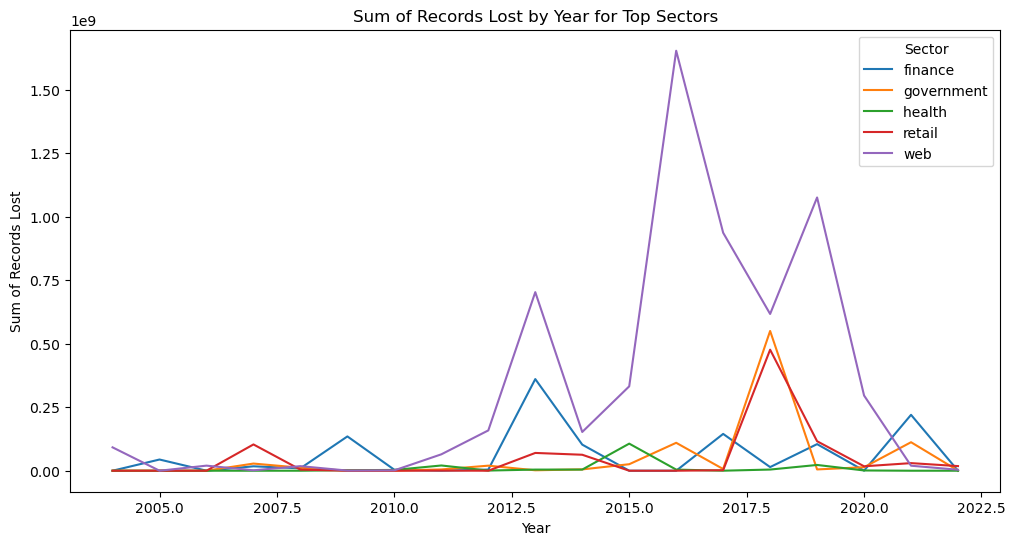

In [34]:
# Filter for the top sectors
data_top_sectors = data[data['Sector'].isin(top_sectors)]

# Group by Sector and Year, and calculate the sum of Records Lost
data_sector_year_records = data_top_sectors.groupby(['Sector', 'Year']).agg({'Records Lost Clean':'sum'}).reset_index()

# Pivot the data to get years as rows, sectors as columns, and sum of records lost as values
data_sector_year_records_pivot = data_sector_year_records.pivot(index='Year', columns='Sector', values='Records Lost Clean')

# Fill missing values with 0 (for years when no records were lost in certain sectors)
data_sector_year_records_pivot = data_sector_year_records_pivot.fillna(0)

# Plot a line chart for each sector
data_sector_year_records_pivot.plot(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Sum of Records Lost')
plt.title('Sum of Records Lost by Year for Top Sectors')
plt.legend(title='Sector')
plt.show()


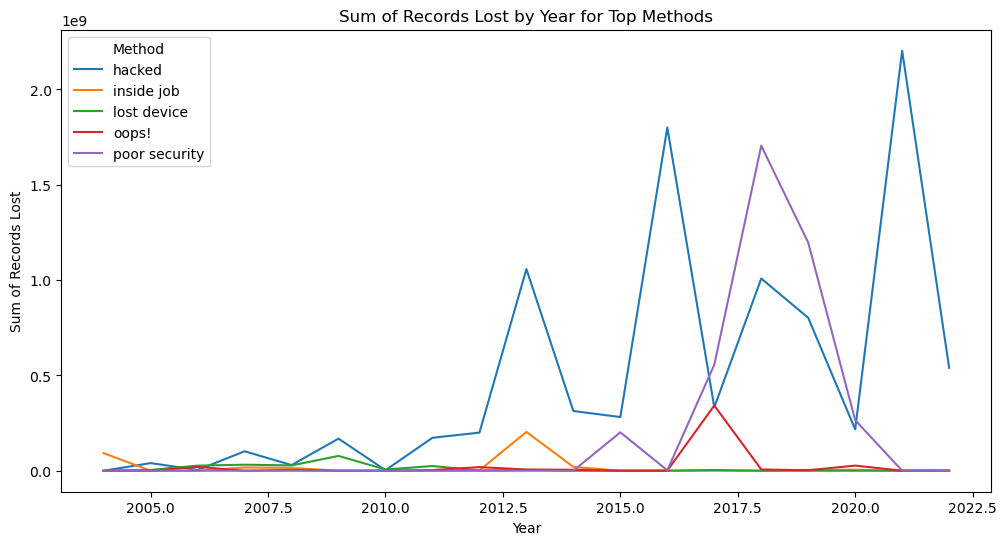

In [35]:
# Filter for the top methods
data_top_methods = data[data['Method'].isin(data_method_top5)]

# Group by Method and Year, and calculate the sum of Records Lost
data_method_year_records = data_top_methods.groupby(['Method', 'Year']).agg({'Records Lost Clean':'sum'}).reset_index()

# Pivot the data to get years as rows, methods as columns, and sum of records lost as values
data_method_year_records_pivot = data_method_year_records.pivot(index='Year', columns='Method', values='Records Lost Clean')

# Fill missing values with 0 (for years when no records were lost for certain methods)
data_method_year_records_pivot = data_method_year_records_pivot.fillna(0)

# Plot a line chart for each method
data_method_year_records_pivot.plot(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Sum of Records Lost')
plt.title('Sum of Records Lost by Year for Top Methods')
plt.legend(title='Method')
plt.show()


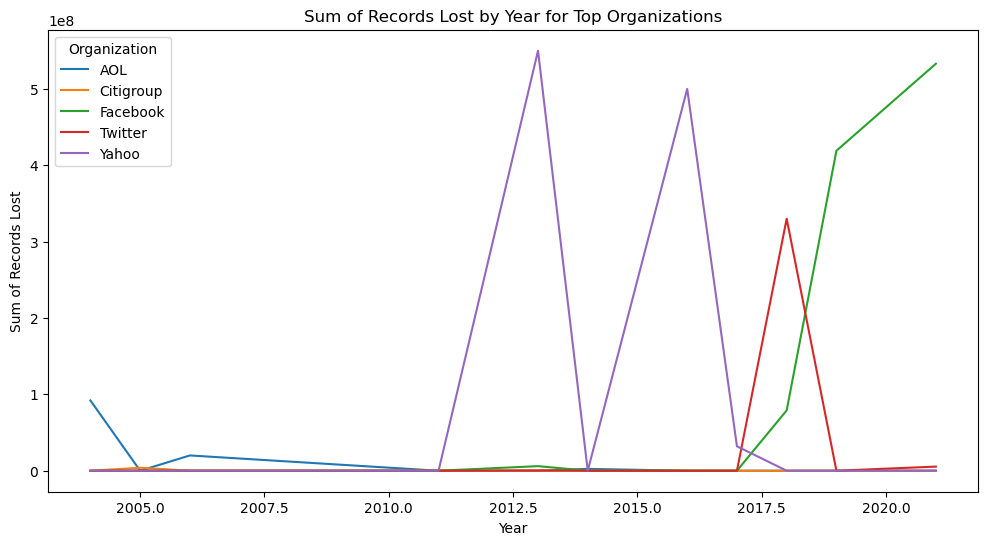

In [36]:
# Filter for the top organizations
data_top_orgs = data[data['Organization'].isin(data_org_top5)]

# Group by Organization and Year, and calculate the sum of Records Lost
data_org_year_records = data_top_orgs.groupby(['Organization', 'Year']).agg({'Records Lost Clean':'sum'}).reset_index()

# Pivot the data to get years as rows, organizations as columns, and sum of records lost as values
data_org_year_records_pivot = data_org_year_records.pivot(index='Year', columns='Organization', values='Records Lost Clean')

# Fill missing values with 0 (for years when no records were lost in certain organizations)
data_org_year_records_pivot = data_org_year_records_pivot.fillna(0)

# Plot a line chart for each organization
data_org_year_records_pivot.plot(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Sum of Records Lost')
plt.title('Sum of Records Lost by Year for Top Organizations')
plt.legend(title='Organization')
plt.show()
